In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
m = 1000  # Number of samples
n = 5     # Number of features

# Random feature matrix (X)
X = np.random.rand(m, n)

# True coefficients (θ)
true_theta = np.array([3, -2, 0, 1.5, -1])

# Linear relationship with noise
noise = np.random.randn(m) * 0.5
y = X @ true_theta + noise  # y = Xθ + noise

In [3]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use the same scaler for test data

In [4]:
# Initialize θ with random values
np.random.seed(42)
theta = np.random.randn(n)

# Hyperparameters
learning_rate = 0.01
lambda_ = 0.1  # Regularization strength (λ)
epochs = 1000

Epoch 0, Loss: 1.4379381547101517
Epoch 100, Loss: 0.5110238251605641
Epoch 200, Loss: 0.38919026191569195
Epoch 300, Loss: 0.37298682631166913
Epoch 400, Loss: 0.3708056259652748
Epoch 500, Loss: 0.3705084206029969
Epoch 600, Loss: 0.37046743790561804
Epoch 700, Loss: 0.370461721403684
Epoch 800, Loss: 0.3704609153610482
Epoch 900, Loss: 0.37046080056517977


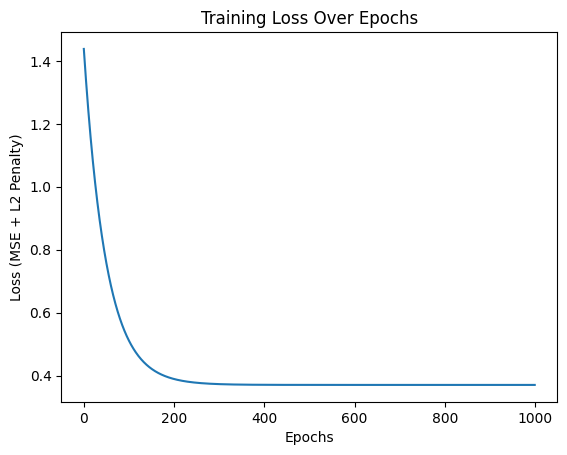

In [5]:
# Gradient Descent with L2 Regularization
m_train = len(X_train)  # Number of training samples
loss_history = []

for epoch in range(epochs):
    # Forward Pass: Compute predictions
    y_pred = X_train @ theta

    # Compute Loss (MSE + L2 Penalty)
    mse = (1 / (2 * m_train)) * np.sum((y_pred - y_train) ** 2)
    l2_penalty = (lambda_ / (2 * m_train)) * np.sum(theta ** 2)
    loss = mse + l2_penalty
    loss_history.append(loss)

    # Backward Pass: Compute gradients
    gradients = (1 / m_train) * X_train.T @ (y_pred - y_train) + (lambda_ / m_train) * theta

    # Update θ
    theta -= learning_rate * gradients

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot loss history
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE + L2 Penalty)")
plt.title("Training Loss Over Epochs")
plt.show()

Test MSE: 0.8534
Test R²: 0.3928


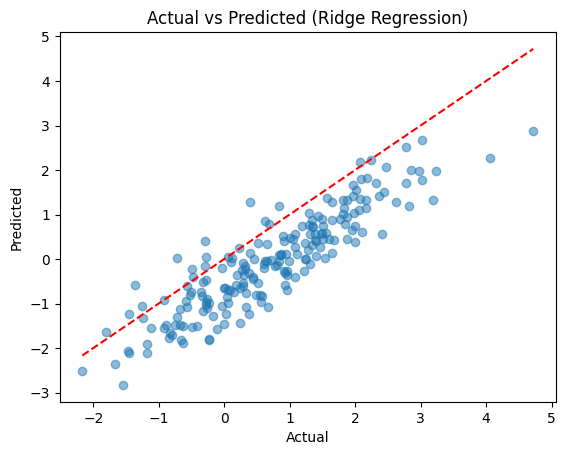

In [6]:
# Predict on test set
y_test_pred = X_test @ theta

# Metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

# Visualize predictions vs actual
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Ridge Regression)")
plt.show()

In [7]:
# New data (random example)
new_data = np.random.rand(1, n)  # 1 sample with n features
new_data_scaled = scaler.transform(new_data)  # Apply same scaling

# Predict
prediction = new_data_scaled @ theta
print(f"Prediction for new data: {prediction}")

Prediction for new data: [-1.36720276]
